In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\IRIS.csv",encoding='unicode_escape')

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Figure size 1200x1000 with 0 Axes>

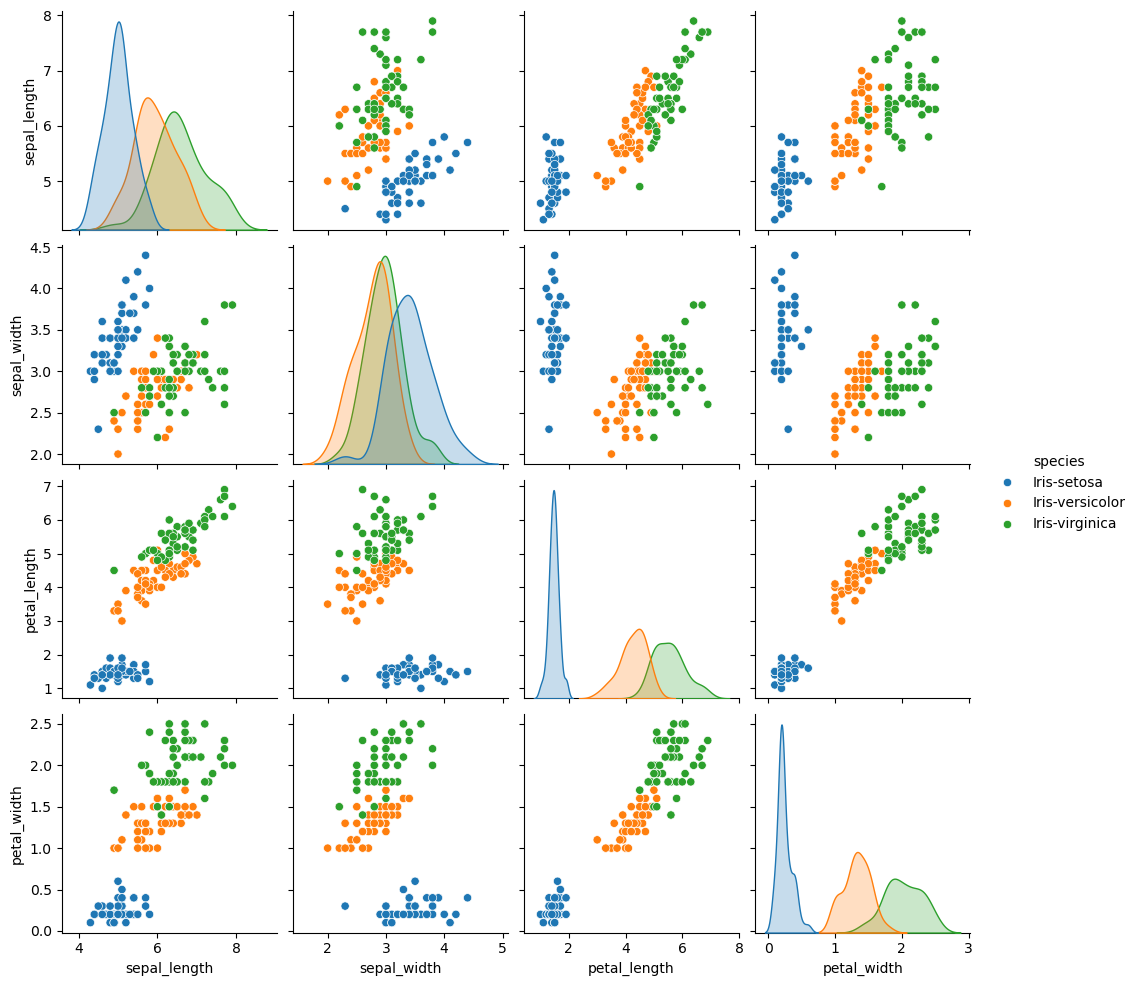

In [7]:
import warnings 
warnings.filterwarnings('ignore')

# Pairplot of Features colored by species
plt.figure(figsize=(12,10))
sns.pairplot(data=df,hue = 'species');

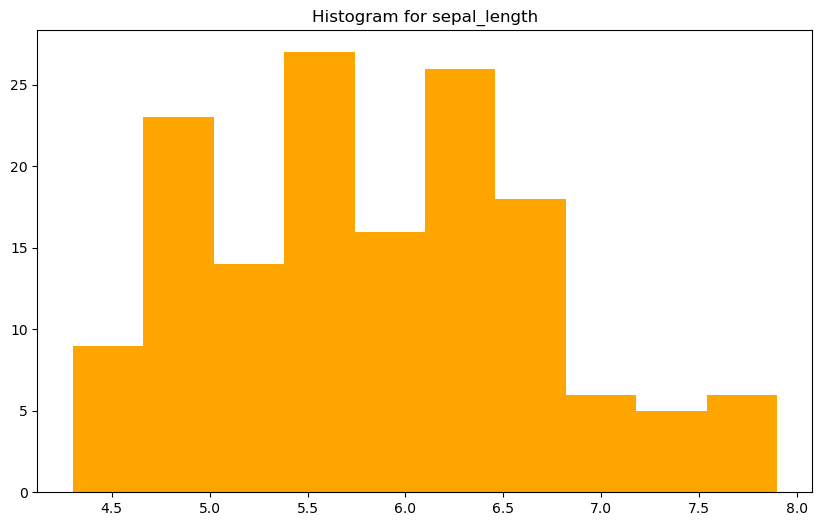

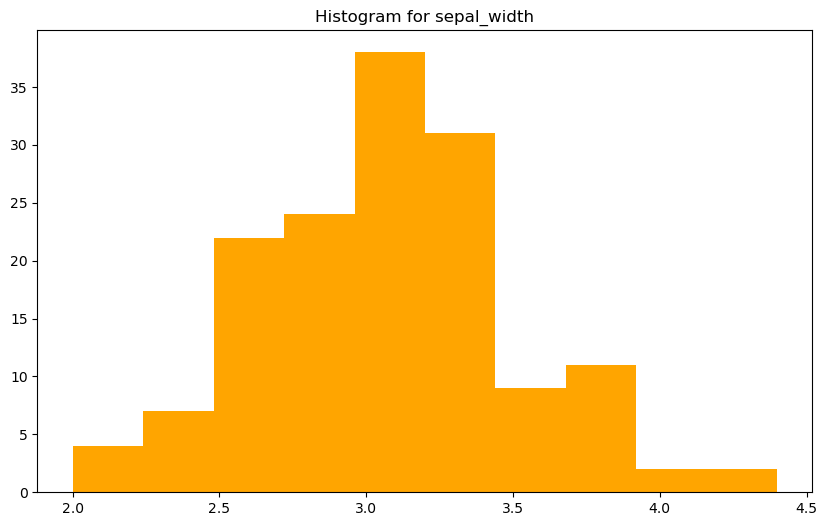

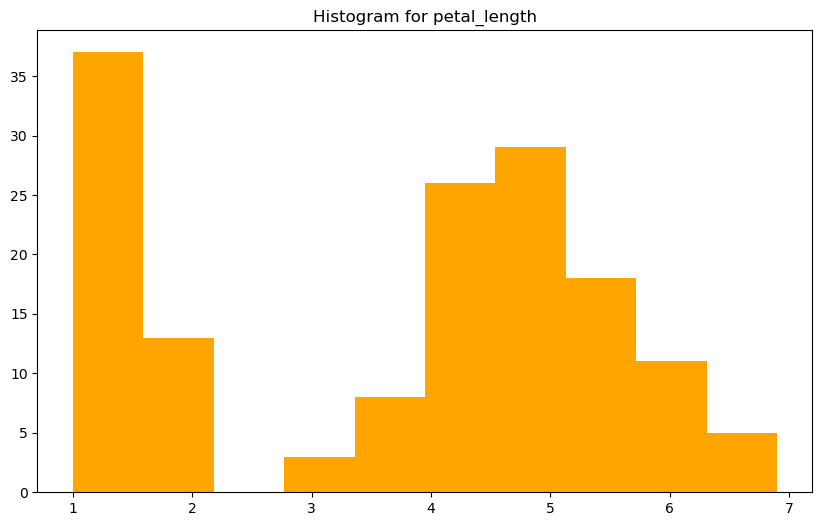

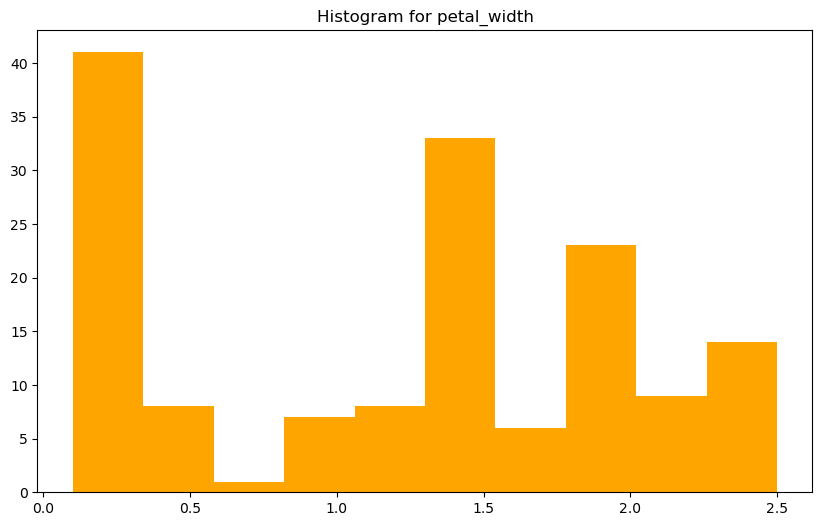

In [8]:
features = df[['sepal_length','sepal_width','petal_length','petal_width']]

for cols in features:
    plt.figure(figsize=(10,6));
    plt.hist(df[cols],color = 'orange')
    plt.title(f'Histogram for {cols}')

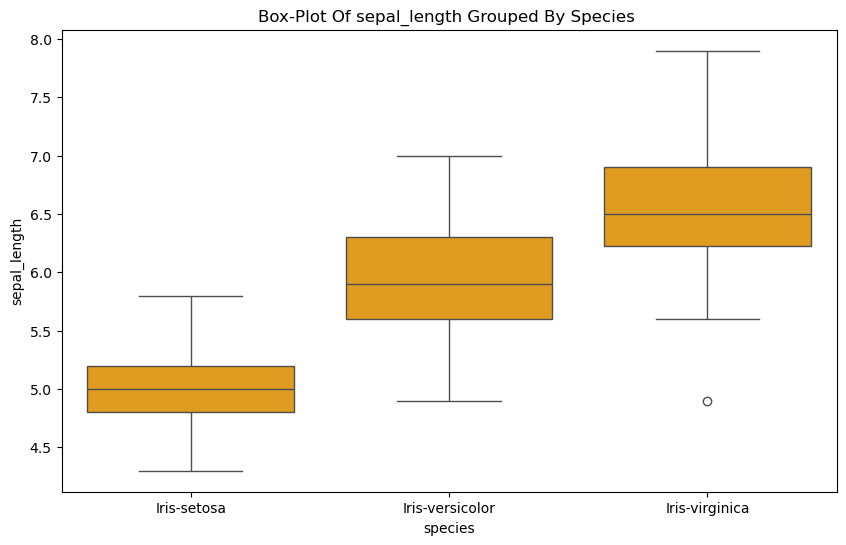

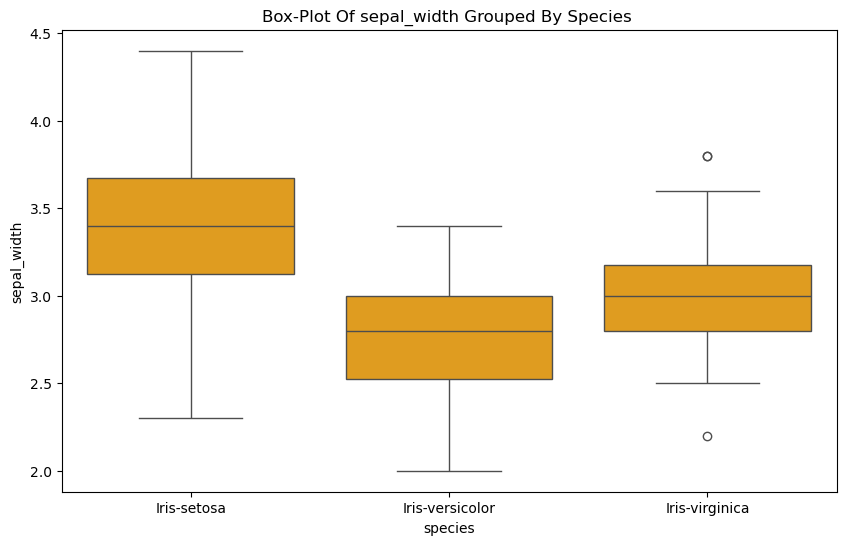

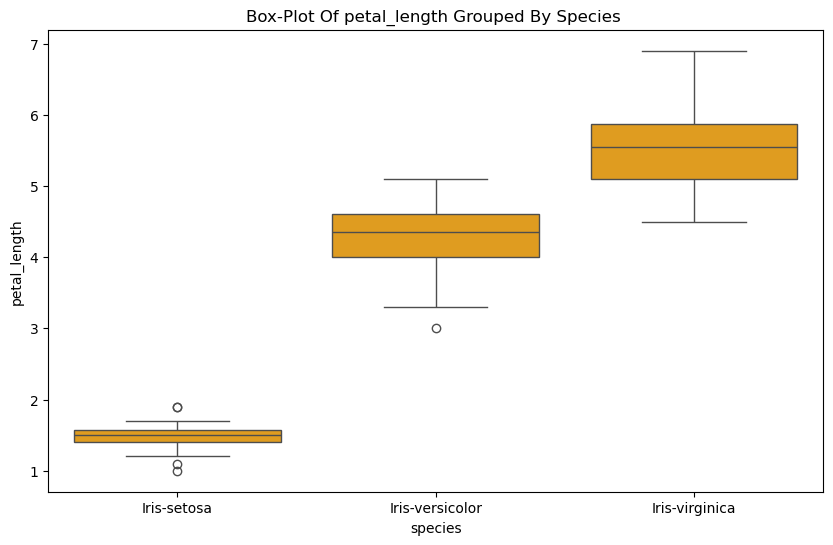

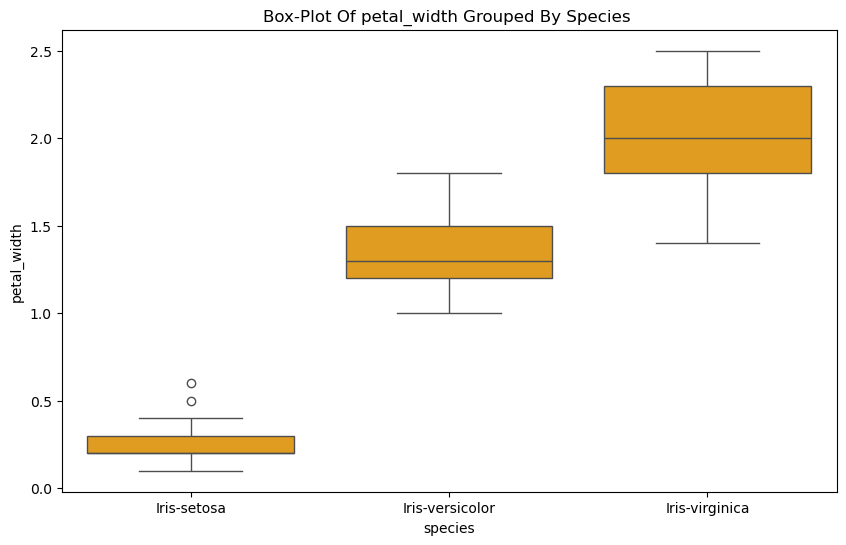

In [9]:
for cols in features:
    plt.figure(figsize=(10,6))
    sns.boxplot(data = df,x='species',y = cols,color = 'orange')
    plt.title(f'Box-Plot Of {cols} Grouped By Species ')

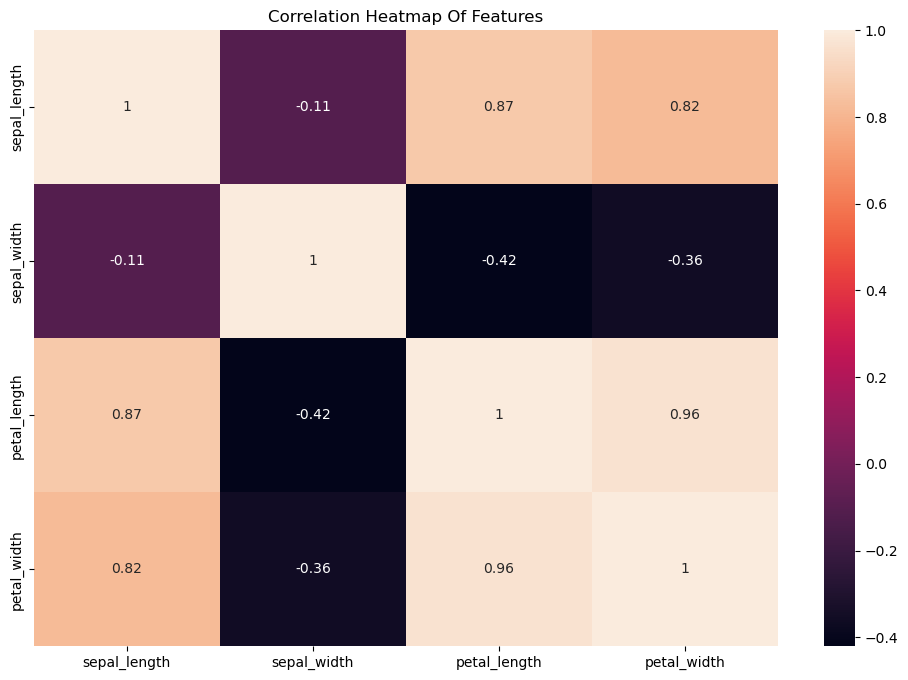

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(features.corr(),annot = True)
plt.title('Correlation Heatmap Of Features');

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoded_target = encoder.fit_transform(df['species'])

In [13]:
x = df.drop('species',axis =1)
y = encoded_target

In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [16]:
model.fit(x_train,y_train)
preds = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score , classification_report

acc = accuracy_score(y_test,preds)
creport = classification_report(y_test,preds)

print(f'Accuracy Score of model : {acc}')
print(f'Classification Report of model : {creport}')

Accuracy Score of model : 1.0
Classification Report of model :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,x,y,cv=5)

print(f'Cross Validation Score :\n {scores}')

Cross Validation Score :
 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


In [19]:
scores.mean()

np.float64(0.9666666666666668)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,preds)
labels = ["Setosa", "Versicolor", "Virginica"]

cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

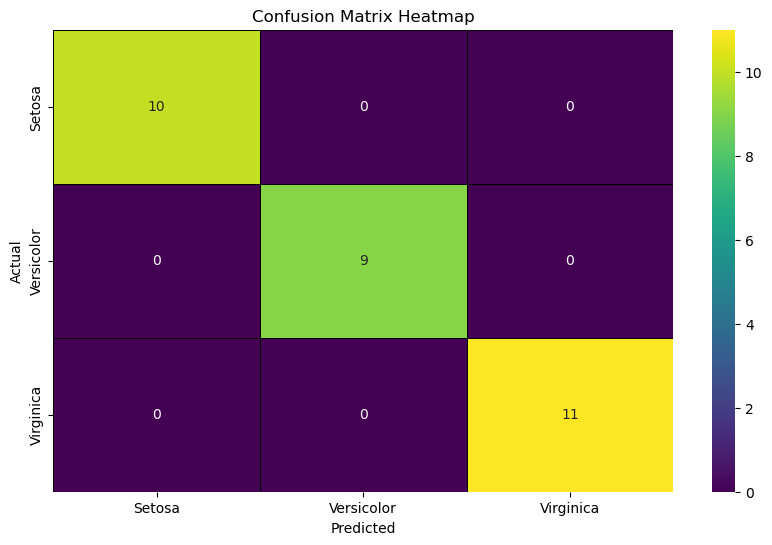

In [21]:
plt.figure(figsize = (10,6))
sns.heatmap(data = cm , annot = True ,
            cmap = 'viridis',
            linecolor = 'black',
            linewidth = '0.5',
           xticklabels=labels, 
            yticklabels=labels);
plt.title('Confusion Matrix Heatmap');
plt.xlabel('Predicted');
plt.ylabel('Actual');
